In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

In [16]:
num_runs = 5

results_saga = []
for run in range(num_runs):
    pickled_data = open(f"converted/saga_runs_bs1_lr1e-02/{run}/train_data.pkl", "rb")
    results_saga.append(pickle.load(pickled_data))

results_svrg = []
for run in range(num_runs):
    pickled_data = open(f"converted/svrg_runs_bs1_lr1e-02/{run}/train_data.pkl", "rb")
    results_svrg.append(pickle.load(pickled_data))

results_sgd = []
for run in range(num_runs):
    pickled_data = open(f"converted/sgd_runs_bs1_lr1e-02/{run}/train_data.pkl", "rb")
    results_sgd.append(pickle.load(pickled_data))

In [17]:
for run in range(num_runs):
    print(results_saga[run].keys())

dict_keys(['train', 'stoch_loss', 'val', 'sampled_indices', 'variances', 'variances_sgd', 'snap_distances', 'distances', 'snapshot_steps'])
dict_keys(['train', 'stoch_loss', 'val', 'sampled_indices', 'variances', 'variances_sgd', 'snap_distances', 'distances', 'snapshot_steps'])
dict_keys(['train', 'stoch_loss', 'val', 'sampled_indices', 'variances', 'variances_sgd', 'snap_distances', 'distances', 'snapshot_steps'])
dict_keys(['train', 'stoch_loss', 'val', 'sampled_indices', 'variances', 'variances_sgd', 'snap_distances', 'distances', 'snapshot_steps'])
dict_keys(['train', 'stoch_loss', 'val', 'sampled_indices', 'variances', 'variances_sgd', 'snap_distances', 'distances', 'snapshot_steps'])


In [25]:
key = "snap_distances"
steps = np.array(list(range(3000))) # 20 * np.array(list(range(150)))

saga = []
for run in range(num_runs):
    saga.append(results_saga[run][key])
saga = np.array(saga)[::,::,-1:].reshape([num_runs, len(saga[0])])

print(np.linalg.norm(saga))

svrg = []
for run in range(num_runs):
    svrg.append(results_svrg[run][key])
svrg = np.array(svrg)[::,::,-1:].reshape([num_runs, len(svrg[0])])

sgd = []
for run in range(num_runs):
    sgd.append(results_sgd[run]["distances"])
sgd = np.array(sgd)[::,::,-1:].reshape([num_runs, len(sgd[0]), ])

0.0


In [20]:
mean_saga = np.mean(saga, axis=0)
std_saga = np.std(saga, axis=0)

ci_low_saga, ci_up_saga = mean_saga - 1.96*std_saga/np.sqrt(num_runs), mean_saga + 1.96*std_saga/np.sqrt(num_runs)

mean_svrg = np.mean(svrg, axis=0)
std_svrg = np.std(svrg, axis=0)

ci_low_svrg, ci_up_svrg = mean_svrg - 1.96*std_svrg/np.sqrt(num_runs), mean_svrg + 1.96*std_svrg/np.sqrt(num_runs)

mean_sgd = np.mean(sgd, axis=0)
std_sgd = np.std(sgd, axis=0)

ci_low_sgd, ci_up_sgd = mean_sgd - 1.96*std_sgd/np.sqrt(num_runs), mean_sgd + 1.96*std_sgd/np.sqrt(num_runs)

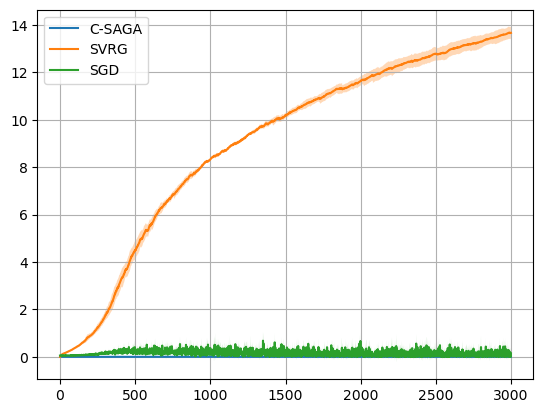

In [21]:

plt.plot(steps, mean_saga, label = "C-SAGA")
plt.fill_between(steps, ci_low_saga, ci_up_saga, alpha = 0.3)

plt.plot(steps, mean_svrg, label = "SVRG")
plt.fill_between(steps, ci_low_svrg, ci_up_svrg, alpha = 0.3)

plt.plot(steps, mean_sgd, label = "SGD")
plt.fill_between(steps, ci_low_sgd, ci_up_sgd, alpha = 0.3)

"""
mean_sgd = mean_sgd + np.ones(shape=mean_saga.shape)*0.00001

ratio_saga_sgd = mean_saga/mean_sgd
ratio_svrg_sgd = mean_svrg/mean_sgd

plt.plot(steps, ratio_saga_sgd, label = "C-SAGA")
plt.plot(steps, ratio_svrg_sgd, label = "SVRG")

print(np.mean(ratio_saga_sgd), np.mean(ratio_svrg_sgd))
"""

plt.legend()
plt.grid()
plt.show()